# Data Overview

*Imports and data_folder access*

In [1]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
#data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [2]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

# File structure:
## trial_data.csv 
Trial matrix, readable as a pandas dataframe. Times are in indices, i.e. can be used directly to index arrays. For example, to access the poisition of the animal at the reward_zone_onset in trial 0, do:

position[trial_data.iloc[0]['reward_zone_onset']]
## behaviour_data.csv
Python dictionary with the following keys:
- time: times in seconds, used to match with neural data
- position: cumulative position of the animal on the threadmill
- lick_onsets: timestamps of lick onsets (in indices)
- lick_onffsets: timestamps of lick offsets (in indices)
- reward_onsets: timestamps of when the reward was give (in indices). It is the same information that can be found in the trial matrix, plus eventual rewards given to encourage the animal.
- reward_offsets: timestamps in indices
## neural_data.csv
Python dictionary with the following keys:
- traces: array with shape n_neurons x n_frames. activations of the neurons over time
- other things not needed for now
## parameters.yml
Parameters used to preprocess the data (not of interest for further analysis)

In [3]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

['Z:\\davide\\2p_data\\441394_ribolla\\20230315\\behaviour_data.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\cnmf.hdf5',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\decoded_log.mat',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\metrics.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\neural_data.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\parameters.yml',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\tif_header.pickle',
 'Z:\\davide\\2p_data\\441394_ribolla\\20230315\\trial_data.csv']

In [4]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441394_ribolla/20230315')

In [5]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


# Trial matrix
the trial matrix is in a .csv file. The structure is the same as before, with 2 exceptions:
- 'trial_duration' is not calculated (can be calculated as tunnel2_offset-env_onset)
- there is no 'clean_trial' label anymore

In [6]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,42156,44218,60055,63356,NaN,1,NaN,NaN,False,49365,52379
1,63356.0,74880,79224,99888,102859,NaN,3,67711.0,70724.0,True,82844,85854
2,102859.0,128087,130916,146712,150998,NaN,2,105920.0,108931.0,True,133734,136756
3,150998.0,165816,168377,202071,205056,NaN,1,NaN,NaN,False,170274,173281
4,205056.0,218075,220576,250030,252168,NaN,2,NaN,NaN,False,222338,225349
5,252168.0,277388,291770,315636,318091,NaN,3,NaN,NaN,False,303934,306949
6,318091.0,337322,340364,357053,359898,NaN,3,NaN,NaN,False,341169,344168
7,359898.0,383703,386747,409504,412930,NaN,1,NaN,NaN,False,388690,391701
8,412930.0,430375,450378,510654,512845,NaN,2,417199.0,420207.0,True,452787,455796
9,512845.0,691339,694429,719115,721463,NaN,2,NaN,NaN,False,695632,698636


# Behavioural data

In [7]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [8]:
position = b_data['position']
pos_list = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    print(f'{i}: {np.max(pos_segment)-np.min(pos_segment)}')
    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    pos_list.append(pos_segment)

0: 4294967295
1: 2151
2: 2254
3: 2197
4: 2147
5: 2101
6: 2300
7: 2306
8: 2046
9: 2447
10: 2455
11: 2096
12: 2098
13: 2409
14: 2492
15: 2451
16: 2500
17: 2503
18: 2352
19: 2499
20: 2403
21: 2396
22: 2306
23: 2593
24: 2407
25: 2041
26: 2098
27: 2406
28: 2498
29: 2501
30: 2697
31: 2356
32: 2492
33: 2448
34: 2506
35: 2502
36: 2351
37: 2446
38: 2450
39: 2446


In [9]:
# Insight into what the behavioural data contains.
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (2167704,)
position with shape: (2167704,)
lick_onsets with shape: (864,)
lick_offsets with shape: (865,)
reward_onsets with shape: (41,)
reward_offsets with shape: (41,)


In [10]:
b_data['lick_offsets'][:-1]-b_data['lick_onsets']

array([   -86,   -212,   -659,   -538,     -6,    -93,   -853, -10948,
       -15246,   -107,  -4654,     -9,   -791,    -14,    -30,  -1282,
        -6813,  -1230,   -148,  -4662,   -119,   -109,   -212,   -243,
         -112,   -106,   -251,   -115,   -964,   -131,   -419,   -127,
        -1756,   -129,  -5708,   -104,  -3459, -11679,   -404,   -543,
        -1017,  -1561,  -2238,   -946,    -80,    -77,    -89,    -89,
          -93,   -107,   -108,   -115,   -111,   -809,  -1945,   -113,
         -111,  -5156,   -129,   -913,   -803,   -747,  -1224,  -1653,
         -954,   -902,  -7760,   -143,  -3947,   -184,   -289,   -443,
           -3,    -27,   -358,    -29,   -720,   -343, -10607,  -2154,
         -127,  -1213,  -1613,  -1723,   -751,    -99,    -79,    -94,
          -85,    -99,  -2589,   -138,  -4248,  -1375,  -3665,   -160,
        -1459,  -1258,  -1482,     -8,  -1054,  -4564,  -1896,    -25,
        -7668,  -2076,  -1271,    -21,   -192,    -90,   -102,  -7170,
      

# Neural data

In [11]:
ndata_file = selected_data_session.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

In [12]:
for k in n_data.keys():
    if type(n_data[k])==np.ndarray:
        print(f'{k}-> array with shape: {n_data[k].shape}')
    else:
        print(f'{k}-> list with len {len(n_data[k])}')

traces-> array with shape: (191, 63904)
footprints-> array with shape: (492, 492, 191)
df_f-> array with shape: (191, 63904)
deconvolved-> list with len 191
positions-> array with shape: (191, 2)
contour-> list with len 191


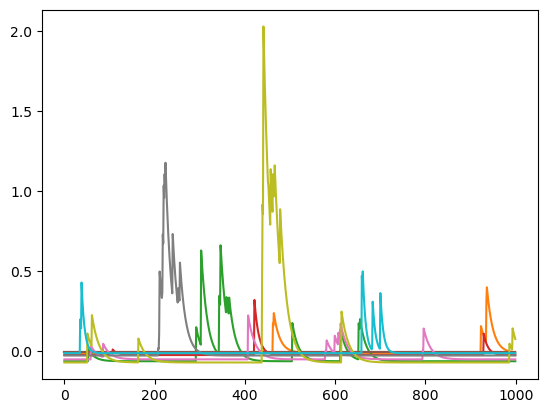

In [13]:
for i in range(10):
    plt.plot(n_data['traces'][i,:1000])